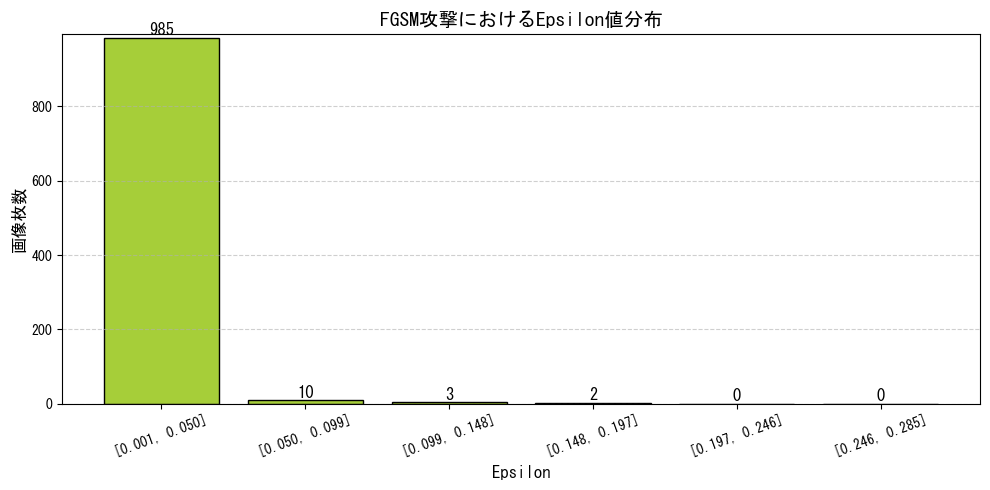

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === CSV読み込み ===
csv_path = r"C:\Users\sit\wavelet_CGAN\testdata3\data1_FGSM\FGSM_Results.csv"   # ← CSVファイルのパスに変更
df = pd.read_csv(csv_path)

# === Epsilon列を取得 ===
eps_values = df["Advs_eps"].values

# === ビンの範囲を指定（例の図と同じ階級に設定） ===
bins = [0.001, 0.05, 0.099, 0.148, 0.197, 0.246, 0.285]

# === ヒストグラム作成 ===
counts, bin_edges = np.histoAdvs_epsgram(eps_values, bins=bins)

# === 描画設定 ===
plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(counts)), counts, width=0.8, color="#A6CE39", edgecolor="black")

# === 棒グラフの上に値を表示 ===
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha="center", va="bottom", fontsize=12)

# === X軸ラベルを階級値に変更 ===
bin_labels = [f"[{bins[i]:.3f}, {bins[i+1]:.3f}]" for i in range(len(bins)-1)]
plt.xticks(range(len(counts)), bin_labels, rotation=20)

plt.xlabel("Epsilon", fontsize=12)
plt.ylabel("画像枚数", fontsize=12)
plt.title("FGSM攻撃におけるEpsilon値分布", fontsize=14)
plt.ylim(0, max(counts) + 10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


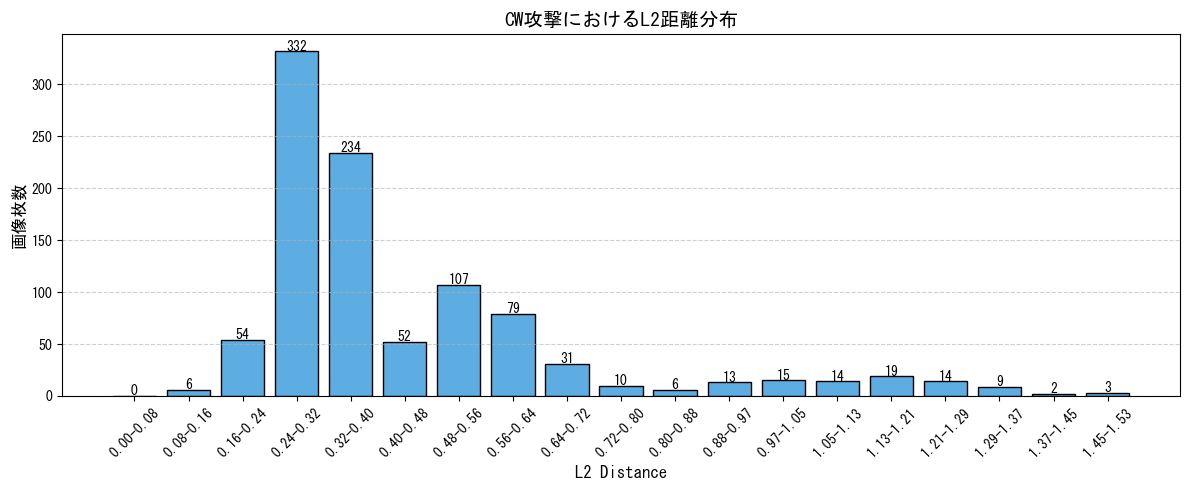

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# === 日本語フォント設定（Windows用） ===
mpl.rcParams['font.family'] = 'MS Gothic'

# === CSV読み込み ===
csv_path = r"C:\Users\sit\wavelet_CGAN\testdata3\data3_CW\CW_Results.csv"
df = pd.read_csv(csv_path)

# === L2距離列を取得 ===
l2_values = df["L2_Distance"].values

# === ビン設定（自動 or 固定幅）===
bins = np.linspace(0, max(l2_values), 20)   # 0〜max を20分割（適宜調整可）
counts, bin_edges = np.histogram(l2_values, bins=bins)
bin_labels = [f"{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]

# === グラフ描画 ===
plt.figure(figsize=(12, 5))
plt.bar(range(len(counts)), counts, color="#5DADE2", edgecolor="black")

# 値表示
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha="center", fontsize=10)

plt.title("CW攻撃におけるL2距離分布", fontsize=14)
plt.xlabel("L2 Distance", fontsize=12)
plt.ylabel("画像枚数", fontsize=12)
plt.xticks(range(len(counts)), bin_labels, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
